In [56]:
import subprocess
import os

import pandas as pd

import requests
from bs4 import BeautifulSoup

import json

import numpy as np


pd.set_option('display.max_rows', 500)

## Data Understanding¶
### RKI, webscrape (webscraping) https://www.rki.de/DE/Content/InfAZ/N/Neuartiges_Coronavirus/Fallzahlen.html
### John Hopkins (GITHUB) https://github.com/CSSEGISandData/COVID-19.git
### REST API services to retreive data https://npgeo-corona-npgeo-de.hub.arcgis.com/
## GITHUB csv data
### git clone/pull https://github.com/CSSEGISandData/COVID-19.git

In [3]:
import pandas as pd

In [4]:
data_path='../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
pd_raw = pd.read_csv(data_path)

In [5]:
pd_raw.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  7/7/20  7/8/20  7/9/20  7/10/20  \
0        0        0        0        0  ...   33384   33594   33908    34194   
1        0        0        0        0  ...    3038    3106    3188     3278   
2        0        0        0        0  ...   16879   17348   17808    18242   
3        0        0        0        0  ...     855     855     855      855   
4        0        0        0        0  ...     386     386     396      458   

   7/11/20  7/12/20  7/13/20  7/14/20  7/15/20  7/16/20  
0    34366    34451    34455    34740    34994    35070  
1     3371     3454     3571     3667     3752     3851  
2    18712    19195    19689    20216    20770    21355  
3      855      855      858      861      862      877  
4      462      506      525      541      576      607  

[5 rows x 181 columns]

## Note:
### Pandas require to specify the date as date type

In [15]:
pd.set_option('max_columns', None)

In [16]:
pd_raw

Province/State                    Country/Region  \
0                                 NaN                       Afghanistan   
1                                 NaN                           Albania   
2                                 NaN                           Algeria   
3                                 NaN                           Andorra   
4                                 NaN                            Angola   
5                                 NaN               Antigua and Barbuda   
6                                 NaN                         Argentina   
7                                 NaN                           Armenia   
8        Australian Capital Territory                         Australia   
9                     New South Wales                         Australia   
10                 Northern Territory                         Australia   
11                         Queensland                         Australia   
12                    South Australia                         Australia   
13                           Tasmania                         Australia   
14                           Victoria                         Australia   
15                  Western Australia                         Australia   
16                                NaN                           Austria   
17                                NaN                        Azerbaijan   
18                                NaN                           Bahamas   
19                                NaN                           Bahrain   
20                                NaN                        Bangladesh   
21                                NaN                          Barbados   
22                                NaN                           Belarus   
23                                NaN                           Belgium   
24                                NaN                             Benin   
25                                NaN                            Bhutan   
26                                NaN                           Bolivia   
27                                NaN            Bosnia and Herzegovina   
28                                NaN                            Brazil   
29                                NaN                            Brunei   
30                                NaN                          Bulgaria   
31                                NaN                      Burkina Faso   
32                                NaN                        Cabo Verde   
33                                NaN                          Cambodia   
34                                NaN                          Cameroon   
35                            Alberta                            Canada   
36                   British Columbia                            Canada   
37                     Grand Princess                            Canada   
38                           Manitoba                            Canada   
39                      New Brunswick                            Canada   
40          Newfoundland and Labrador                            Canada   
41                        Nova Scotia                            Canada   
42                            Ontario                            Canada   
43               Prince Edward Island                            Canada   
44                             Quebec                            Canada   
45                       Saskatchewan                            Canada   
46                                NaN          Central African Republic   
47                                NaN                              Chad   
48                                NaN                             Chile   
49                              Anhui                             China   
50                            Beijing                             China   
51                          Chongqing                             China   
52                             Fujian           

In [23]:
pd_raw.columns[:]

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '7/7/20', '7/8/20', '7/9/20', '7/10/20', '7/11/20', '7/12/20',
       '7/13/20', '7/14/20', '7/15/20', '7/16/20'],
      dtype='object', length=181)

In [28]:
time_index = pd_raw.columns[4:]

In [27]:
print(pd_raw.columns.values)


['Province/State' 'Country/Region' 'Lat' 'Long' '1/22/20' '1/23/20'
 '1/24/20' '1/25/20' '1/26/20' '1/27/20' '1/28/20' '1/29/20' '1/30/20'
 '1/31/20' '2/1/20' '2/2/20' '2/3/20' '2/4/20' '2/5/20' '2/6/20' '2/7/20'
 '2/8/20' '2/9/20' '2/10/20' '2/11/20' '2/12/20' '2/13/20' '2/14/20'
 '2/15/20' '2/16/20' '2/17/20' '2/18/20' '2/19/20' '2/20/20' '2/21/20'
 '2/22/20' '2/23/20' '2/24/20' '2/25/20' '2/26/20' '2/27/20' '2/28/20'
 '2/29/20' '3/1/20' '3/2/20' '3/3/20' '3/4/20' '3/5/20' '3/6/20' '3/7/20'
 '3/8/20' '3/9/20' '3/10/20' '3/11/20' '3/12/20' '3/13/20' '3/14/20'
 '3/15/20' '3/16/20' '3/17/20' '3/18/20' '3/19/20' '3/20/20' '3/21/20'
 '3/22/20' '3/23/20' '3/24/20' '3/25/20' '3/26/20' '3/27/20' '3/28/20'
 '3/29/20' '3/30/20' '3/31/20' '4/1/20' '4/2/20' '4/3/20' '4/4/20'
 '4/5/20' '4/6/20' '4/7/20' '4/8/20' '4/9/20' '4/10/20' '4/11/20'
 '4/12/20' '4/13/20' '4/14/20' '4/15/20' '4/16/20' '4/17/20' '4/18/20'
 '4/19/20' '4/20/20' '4/21/20' '4/22/20' '4/23/20' '4/24/20' '4/25/20'
 '4/26/20' '4/27

In [29]:
time_index

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '7/7/20', '7/8/20', '7/9/20', '7/10/20', '7/11/20', '7/12/20',
       '7/13/20', '7/14/20', '7/15/20', '7/16/20'],
      dtype='object', length=177)

In [31]:
df_plot = pd.DataFrame({'time': time_index})

In [32]:
df_plot

time
0    1/22/20
1    1/23/20
2    1/24/20
3    1/25/20
4    1/26/20
5    1/27/20
6    1/28/20
7    1/29/20
8    1/30/20
9    1/31/20
10    2/1/20
11    2/2/20
12    2/3/20
13    2/4/20
14    2/5/20
15    2/6/20
16    2/7/20
17    2/8/20
18    2/9/20
19   2/10/20
20   2/11/20
21   2/12/20
22   2/13/20
23   2/14/20
24   2/15/20
25   2/16/20
26   2/17/20
27   2/18/20
28   2/19/20
29   2/20/20
30   2/21/20
31   2/22/20
32   2/23/20
33   2/24/20
34   2/25/20
35   2/26/20
36   2/27/20
37   2/28/20
38   2/29/20
39    3/1/20
40    3/2/20
41    3/3/20
42    3/4/20
43    3/5/20
44    3/6/20
45    3/7/20
46    3/8/20
47    3/9/20
48   3/10/20
49   3/11/20
50   3/12/20
51   3/13/20
52   3/14/20
53   3/15/20
54   3/16/20
55   3/17/20
56   3/18/20
57   3/19/20
58   3/20/20
59   3/21/20
60   3/22/20
61   3/23/20
62   3/24/20
63   3/25/20
64   3/26/20
65   3/27/20
66   3/28/20
67   3/29/20
68   3/30/20
69   3/31/20
70    4/1/20
71    4/2/20
72    4/3/20
73    4/4/20
74    4/5/20
75    4/6/20
76    4/7/20
77    4/8/20
78    4/9/20
79   4/10/20
80   4/11/20
81   4/12/20
82   4/13/20
83   4/14/20
84   4/15/20
85   4/16/20
86   4/17/20
87   4/18/20
88   4/19/20
89   4/20/20
90   4/21/20
91   4/22/20
92   4/23/20
93   4/24/20
94   4/25/20
95   4/26/20
96   4/27/20
97   4/28/20
98   4/29/20
99   4/30/20
100   5/1/20
101   5/2/20
102   5/3/20
103   5/4/20
104   5/5/20
105   5/6/20
106   5/7/20
107   5/8/20
108   5/9/20
109  5/10/20
110  5/11/20
111  5/12/20
112  5/13/20
113  5/14/20
114  5/15/20
115  5/16/20
116  5/17/20
117  5/18/20
118  5/19/20
119  5/20/20
120  5/21/20
121  5/22/20
122  5/23/20
123  5/24/20
124  5/25/20
125  5/26/20
126  5/27/20
127  5/28/20
128  5/29/20
129  5/30/20
130  5/31/20
131   6/1/20
132   6/2/20
133   6/3/20
134   6/4/20
135   6/5/20
136   6/6/20
137   6/7/20
138   6/8/20
139   6/9/20
140  6/10/20
141  6/11/20
142  6/12/20
143  6/13/20
144  6/14/20
145  6/15/20
146  6/16/20
147  6/17/20
148  6/18/20
149  6/19/20
150  6/20/20
151  6/21/20
152  6/22/20
153  6/23/20
154  6/24/20
155  6/25/20
156  6/26/20
157  6/27/20
158  6/28/20
159  6/29/20
160  6/30/20
161   7/1/20
162   7/2/20
163   7/3/20
164   7/4/20
165   7/5/20
166   7/6/20
167   7/7/20
168   7/8/20
169   7/9/20
170  7/10/20
171  7/11/20
172  7/12/20
173  7/13/20
174  7/14/20
175  7/15/20
176  7/16/20

In [34]:
pd_raw['Country/Region'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria',
       'Burkina Faso', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Diamond Princess', 'Cuba', 'Cyprus',
       'Czechia', 'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador',
       'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala',
       'Guinea', 'Guyana', 'Haiti', 'Holy See', 'Honduras', 'Hungary',
       'Iceland', 'India

In [35]:
len(pd_raw['Country/Region'].unique())

188

In [45]:
dataNetherlands = pd_raw[pd_raw['Country/Region'] == 'Netherlands']
dataNetherlands

Province/State Country/Region      Lat     Long  \
166                             Aruba    Netherlands  12.5211 -69.9683   
167                           Curacao    Netherlands  12.1696 -68.9900   
168                      Sint Maarten    Netherlands  18.0425 -63.0548   
169                               NaN    Netherlands  52.1326   5.2913   
255  Bonaire, Sint Eustatius and Saba    Netherlands  12.1784 -68.2385   

     1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  1/29/20  \
166        0        0        0        0        0        0        0        0   
167        0        0        0        0        0        0        0        0   
168        0        0        0        0        0        0        0        0   
169        0        0        0        0        0        0        0        0   
255        0        0        0        0        0        0        0        0   

     1/30/20  1/31/20  2/1/20  2/2/20  2/3/20  2/4/20  2/5/20  2/6/20  2/7/20  \
166        0        0       0       0       0       0       0       0       0   
167        0        0       0       0       0       0       0       0       0   
168        0        0       0       0       0       0       0       0       0   
169        0        0       0       0       0       0       0       0       0   
255        0        0       0       0       0       0       0       0       0   

     2/8/20  2/9/20  2/10/20  2/11/20  2/12/20  2/13/20  2/14/20  2/15/20  \
166       0       0        0        0        0        0        0        0   
167       0       0        0        0        0        0        0        0   
168       0       0        0        0        0        0        0        0   
169       0       0        0        0        0        0        0        0   
255       0       0        0        0        0        0        0        0   

     2/16/20  2/17/20  2/18/20  2/19/20  2/20/20  2/21/20  2/22/20  2/23/20  \
166        0        0        0        0        0        0        0        0   
167        0        0        0        0        0        0        0        0   
168        0        0        0        0        0        0        0        0   
169        0        0        0        0        0        0        0        0   
255        0        0        0        0        0        0        0        0   

     2/24/20  2/25/20  2/26/20  2/27/20  2/28/20  2/29/20  3/1/20  3/2/20  \
166        0        0        0        0        0        0       0       0   
167        0        0        0        0        0        0       0       0   
168        0        0        0        0        0        0       0       0   
169        0        0        0        1        1        6      10      18   
255        0        0        0        0        0        0       0       0   

     3/3/20  3/4/20  3/5/20  3/6/20  3/7/20  3/8/20  3/9/20  3/10/20  3/11/20  \
166       0       0       0       0       0       0       0        0        0   
167       0       0       0       0       0       0       0        0        0   
168       0       0       0       0       0       0       0        0        0   
169      24      38      82     128     188     265     321      382      503   
255       0       0       0       0       0       0       0        0        0   

     3/12/20  3/13/20  3/14/20  3/15/20  3/16/20  3/17/20  3/18/20  3/19/20  \
166        0        2        2        2        2        3        4        4   
167        0        0        1        1        1        3        3        3   
168        0        0        0        0        0        0        0        0   
169      503      804      959     1135     1413     1705     2051     2460   
255        0        0        0        0        0        0        0        0   

     3/20/20  3/21/20  3/22/20  3/23/20  3/24/20  3/25/20  3/26/20  3/27/20  \
166        5        5        9        9       12       17       28       33   
167        3        3        3        4        6        6        6        8   
168        1    

In [42]:
pd_raw

Province/State                    Country/Region  \
0                                 NaN                       Afghanistan   
1                                 NaN                           Albania   
2                                 NaN                           Algeria   
3                                 NaN                           Andorra   
4                                 NaN                            Angola   
5                                 NaN               Antigua and Barbuda   
6                                 NaN                         Argentina   
7                                 NaN                           Armenia   
8        Australian Capital Territory                         Australia   
9                     New South Wales                         Australia   
10                 Northern Territory                         Australia   
11                         Queensland                         Australia   
12                    South Australia                         Australia   
13                           Tasmania                         Australia   
14                           Victoria                         Australia   
15                  Western Australia                         Australia   
16                                NaN                           Austria   
17                                NaN                        Azerbaijan   
18                                NaN                           Bahamas   
19                                NaN                           Bahrain   
20                                NaN                        Bangladesh   
21                                NaN                          Barbados   
22                                NaN                           Belarus   
23                                NaN                           Belgium   
24                                NaN                             Benin   
25                                NaN                            Bhutan   
26                                NaN                           Bolivia   
27                                NaN            Bosnia and Herzegovina   
28                                NaN                            Brazil   
29                                NaN                            Brunei   
30                                NaN                          Bulgaria   
31                                NaN                      Burkina Faso   
32                                NaN                        Cabo Verde   
33                                NaN                          Cambodia   
34                                NaN                          Cameroon   
35                            Alberta                            Canada   
36                   British Columbia                            Canada   
37                     Grand Princess                            Canada   
38                           Manitoba                            Canada   
39                      New Brunswick                            Canada   
40          Newfoundland and Labrador                            Canada   
41                        Nova Scotia                            Canada   
42                            Ontario                            Canada   
43               Prince Edward Island                            Canada   
44                             Quebec                            Canada   
45                       Saskatchewan                            Canada   
46                                NaN          Central African Republic   
47                                NaN                              Chad   
48                                NaN                             Chile   
49                              Anhui                             China   
50                            Beijing                             China   
51                          Chongqing                             China   
52                             Fujian           

In [53]:
pd_raw[pd_raw['Country/Region']=='Netherlands'].iloc[:,4::].sum(axis=0)[0:4]

1/22/20    0
1/23/20    0
1/24/20    0
1/25/20    0
dtype: int64

In [61]:
country_list=['India','Italy',
              'US',
              'Spain',
              'Germany',
              'Korea, South',
             ]

In [62]:
for each in country_list:
    df_plot[each]=np.array(pd_raw[pd_raw['Country/Region']==each].iloc[:,4::].sum(axis=0))

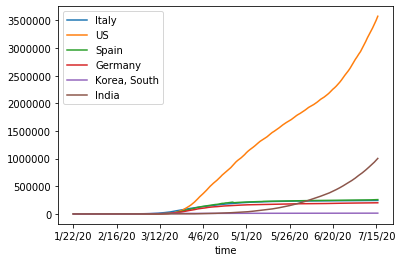

In [63]:
%matplotlib inline
df_plot.set_index('time').plot()

In [59]:
df_plot

time   Italy       US   Spain  Germany  Korea, South
0    1/22/20       0        1       0        0             1
1    1/23/20       0        1       0        0             1
2    1/24/20       0        2       0        0             2
3    1/25/20       0        2       0        0             2
4    1/26/20       0        5       0        0             3
5    1/27/20       0        5       0        1             4
6    1/28/20       0        5       0        4             4
7    1/29/20       0        5       0        4             4
8    1/30/20       0        5       0        4             4
9    1/31/20       2        7       0        5            11
10    2/1/20       2        8       1        8            12
11    2/2/20       2        8       1       10            15
12    2/3/20       2       11       1       12            15
13    2/4/20       2       11       1       12            16
14    2/5/20       2       11       1       12            19
15    2/6/20       2       11       1       12            23
16    2/7/20       3       11       1       13            24
17    2/8/20       3       11       1       13            24
18    2/9/20       3       11       2       14            25
19   2/10/20       3       11       2       14            27
20   2/11/20       3       12       2       16            28
21   2/12/20       3       12       2       16            28
22   2/13/20       3       13       2       16            28
23   2/14/20       3       13       2       16            28
24   2/15/20       3       13       2       16            28
25   2/16/20       3       13       2       16            29
26   2/17/20       3       13       2       16            30
27   2/18/20       3       13       2       16            31
28   2/19/20       3       13       2       16            31
29   2/20/20       3       13       2       16           104
30   2/21/20      20       15       2       16           204
31   2/22/20      62       15       2       16           433
32   2/23/20     155       15       2       16           602
33   2/24/20     229       15       2       16           833
34   2/25/20     322       15       6       17           977
35   2/26/20     453       15      13       27          1261
36   2/27/20     655       16      15       46          1766
37   2/28/20     888       16      32       48          2337
38   2/29/20    1128       24      45       79          3150
39    3/1/20    1694       30      84      130          3736
40    3/2/20    2036       53     120      159          4335
41    3/3/20    2502       73     165      196          5186
42    3/4/20    3089      104     222      262          5621
43    3/5/20    3858      174     259      482          6088
44    3/6/20    4636      222     400      670          6593
45    3/7/20    5883      337     500      799          7041
46    3/8/20    7375      451     673     1040          7314
47    3/9/20    9172      519    1073     1176          7478
48   3/10/20   10149      711    1695     1457          7513
49   3/11/20   12462     1109    2277     1908          7755
50   3/12/20   15113     1561    2277     2078          7869
51   3/13/20   17660     2157    5232     3675          7979
52   3/14/20   21157     2870    6391     4585          8086
53   3/15/20   24747     2968    7798     5795          8162
54   3/16/20   27980     4360    9942     7272          8236
55   3/17/20   31506     6141   11748     9257          8320
56   3/18/20   35713     8917   13910    12327          8413
57   3/19/20   41035    14157   17963    15320          8565
58   3/20/20   47021    19479   20410    19848          8652
59   3/21/20   53578    25825   25374    22213          8799
60   3/22/20   59138    33761   28768    24873          8961
61   3/23/20   63927    43850   35136    29056          8961
62   3/24/20   69176    54112   39885    32986          9037
63   3/25/20   74386    66055   49515    37323          9137
64   3/26/20   80589    84091   57786    43

In [67]:
type(df_plot['time'][0])

str

In [71]:
from datetime import datetime
datetime.strptime(df_plot['time'][0], "%m/%d/%y")

datetime.datetime(2020, 1, 22, 0, 0)

In [77]:
time_index = [datetime.strptime(each, "%m/%d/%y") for each in df_plot.time]
time_index

[datetime.datetime(2020, 1, 22, 0, 0),
 datetime.datetime(2020, 1, 23, 0, 0),
 datetime.datetime(2020, 1, 24, 0, 0),
 datetime.datetime(2020, 1, 25, 0, 0),
 datetime.datetime(2020, 1, 26, 0, 0),
 datetime.datetime(2020, 1, 27, 0, 0),
 datetime.datetime(2020, 1, 28, 0, 0),
 datetime.datetime(2020, 1, 29, 0, 0),
 datetime.datetime(2020, 1, 30, 0, 0),
 datetime.datetime(2020, 1, 31, 0, 0),
 datetime.datetime(2020, 2, 1, 0, 0),
 datetime.datetime(2020, 2, 2, 0, 0),
 datetime.datetime(2020, 2, 3, 0, 0),
 datetime.datetime(2020, 2, 4, 0, 0),
 datetime.datetime(2020, 2, 5, 0, 0),
 datetime.datetime(2020, 2, 6, 0, 0),
 datetime.datetime(2020, 2, 7, 0, 0),
 datetime.datetime(2020, 2, 8, 0, 0),
 datetime.datetime(2020, 2, 9, 0, 0),
 datetime.datetime(2020, 2, 10, 0, 0),
 datetime.datetime(2020, 2, 11, 0, 0),
 datetime.datetime(2020, 2, 12, 0, 0),
 datetime.datetime(2020, 2, 13, 0, 0),
 datetime.datetime(2020, 2, 14, 0, 0),
 datetime.datetime(2020, 2, 15, 0, 0),
 datetime.datetime(2020, 2, 16, 0,

In [81]:
df_plot['date'] = time_index
df_plot.drop('time', inplace = True, axis = 1)
df_plot.head()

Italy  US  Spain  Germany  Korea, South  India       date
0      0   1      0        0             1      0 2020-01-22
1      0   1      0        0             1      0 2020-01-23
2      0   2      0        0             2      0 2020-01-24
3      0   2      0        0             2      0 2020-01-25
4      0   5      0        0             3      0 2020-01-26

In [83]:
df_plot.to_csv('../data/processed/COVID_small_flat_table.csv',sep=';',index=False)


## Relational data model - defining a primary key
### In the relational model of databases, a primary key is a specific choice of a minimal set of attributes (columns) that uniquely specify a tuple (row) in a relation (table) (source: wiki)

### A primary key’s main features are:

### 1. It must contain a unique value for each row of data.
### 2. It cannot contain null values.

In [3]:
import pandas as pd
data_path='../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
pd_raw=pd.read_csv(data_path)
pd_raw.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  7/7/20  7/8/20  7/9/20  7/10/20  \
0        0        0        0        0  ...   33384   33594   33908    34194   
1        0        0        0        0  ...    3038    3106    3188     3278   
2        0        0        0        0  ...   16879   17348   17808    18242   
3        0        0        0        0  ...     855     855     855      855   
4        0        0        0        0  ...     386     386     396      458   

   7/11/20  7/12/20  7/13/20  7/14/20  7/15/20  7/16/20  
0    34366    34451    34455    34740    34994    35070  
1     3371     3454     3571     3667     3752     3851  
2    18712    19195    19689    20216    20770    21355  
3      855      855      858      861      862      877  
4      462      506      525      541      576      607  

[5 rows x 181 columns]

In [4]:
pd_raw

Province/State         Country/Region        Lat       Long  1/22/20  \
0              NaN            Afghanistan  33.939110  67.709953        0   
1              NaN                Albania  41.153300  20.168300        0   
2              NaN                Algeria  28.033900   1.659600        0   
3              NaN                Andorra  42.506300   1.521800        0   
4              NaN                 Angola -11.202700  17.873900        0   
..             ...                    ...        ...        ...      ...   
261            NaN  Sao Tome and Principe   0.186400   6.613100        0   
262            NaN                  Yemen  15.552727  48.516388        0   
263            NaN                Comoros -11.645500  43.333300        0   
264            NaN             Tajikistan  38.861000  71.276100        0   
265            NaN                Lesotho -29.610000  28.233600        0   

     1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  7/7/20  7/8/20  7/9/20  \
0          0        0        0        0        0  ...   33384   33594   33908   
1          0        0        0        0        0  ...    3038    3106    3188   
2          0        0        0        0        0  ...   16879   17348   17808   
3          0        0        0        0        0  ...     855     855     855   
4          0        0        0        0        0  ...     386     386     396   
..       ...      ...      ...      ...      ...  ...     ...     ...     ...   
261        0        0        0        0        0  ...     724     724     726   
262        0        0        0        0        0  ...    1297    1318    1356   
263        0        0        0        0        0  ...     311     313     314   
264        0        0        0        0        0  ...    6315    6364    6410   
265        0        0        0        0        0  ...      91      91     134   

     7/10/20  7/11/20  7/12/20  7/13/20  7/14/20  7/15/20  7/16/20  
0      34194    34366    34451    34455    34740    34994    35070  
1       3278     3371     3454     3571     3667     3752     3851  
2      18242    18712    19195    19689    20216    20770    21355  
3        855      855      855      858      861      862      877  
4        458      462      506      525      541      576      607  
..       ...      ...      ...      ...      ...      ...      ...  
261      727      727      729      732      732      737      740  
262     1380     1389     1465     1498     1516     1526     1552  
263      314      317      317      317      321      321      328  
264     6457     6506     6552     6596     6643     6695     6741  
265      184      184      233      245      256      256      256  

[266 rows x 181 columns]

In [5]:
pd_data_base=pd_raw.rename(columns={'Country/Region':'country',
                      'Province/State':'state'})
pd_data_base['state']=pd_data_base['state'].fillna('no')  #ensure a sring, important for indexing

In [7]:
pd_data_base

state                country        Lat       Long  1/22/20  1/23/20  \
0      no            Afghanistan  33.939110  67.709953        0        0   
1      no                Albania  41.153300  20.168300        0        0   
2      no                Algeria  28.033900   1.659600        0        0   
3      no                Andorra  42.506300   1.521800        0        0   
4      no                 Angola -11.202700  17.873900        0        0   
..    ...                    ...        ...        ...      ...      ...   
261    no  Sao Tome and Principe   0.186400   6.613100        0        0   
262    no                  Yemen  15.552727  48.516388        0        0   
263    no                Comoros -11.645500  43.333300        0        0   
264    no             Tajikistan  38.861000  71.276100        0        0   
265    no                Lesotho -29.610000  28.233600        0        0   

     1/24/20  1/25/20  1/26/20  1/27/20  ...  7/7/20  7/8/20  7/9/20  7/10/20  \
0          0        0        0        0  ...   33384   33594   33908    34194   
1          0        0        0        0  ...    3038    3106    3188     3278   
2          0        0        0        0  ...   16879   17348   17808    18242   
3          0        0        0        0  ...     855     855     855      855   
4          0        0        0        0  ...     386     386     396      458   
..       ...      ...      ...      ...  ...     ...     ...     ...      ...   
261        0        0        0        0  ...     724     724     726      727   
262        0        0        0        0  ...    1297    1318    1356     1380   
263        0        0        0        0  ...     311     313     314      314   
264        0        0        0        0  ...    6315    6364    6410     6457   
265        0        0        0        0  ...      91      91     134      184   

     7/11/20  7/12/20  7/13/20  7/14/20  7/15/20  7/16/20  
0      34366    34451    34455    34740    34994    35070  
1       3371     3454     3571     3667     3752     3851  
2      18712    19195    19689    20216    20770    21355  
3        855      855      858      861      862      877  
4        462      506      525      541      576      607  
..       ...      ...      ...      ...      ...      ...  
261      727      729      732      732      737      740  
262     1389     1465     1498     1516     1526     1552  
263      317      317      317      321      321      328  
264     6506     6552     6596     6643     6695     6741  
265      184      233      245      256      256      256  

[266 rows x 181 columns]

In [8]:
pd_data_base=pd_data_base.drop(['Lat','Long'],axis=1)
pd_data_base.head()

state      country  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  \
0    no  Afghanistan        0        0        0        0        0        0   
1    no      Albania        0        0        0        0        0        0   
2    no      Algeria        0        0        0        0        0        0   
3    no      Andorra        0        0        0        0        0        0   
4    no       Angola        0        0        0        0        0        0   

   1/28/20  1/29/20  ...  7/7/20  7/8/20  7/9/20  7/10/20  7/11/20  7/12/20  \
0        0        0  ...   33384   33594   33908    34194    34366    34451   
1        0        0  ...    3038    3106    3188     3278     3371     3454   
2        0        0  ...   16879   17348   17808    18242    18712    19195   
3        0        0  ...     855     855     855      855      855      855   
4        0        0  ...     386     386     396      458      462      506   

   7/13/20  7/14/20  7/15/20  7/16/20  
0    34455    34740    34994    35070  
1     3571     3667     3752     3851  
2    19689    20216    20770    21355  
3      858      861      862      877  
4      525      541      576      607  

[5 rows x 179 columns]

In [9]:
pd_relational_model=pd_data_base.set_index(['state','country']) \
                                .T                              \
                                .stack(level=[0,1])             \
                                .reset_index()                  \
                                .rename(columns={'level_0':'date',
                                                   0:'confirmed'},
                                                  )
pd_relational_model.head()

date                         state         country  confirmed
0  1/22/20                       Alberta          Canada        0.0
1  1/22/20                      Anguilla  United Kingdom        0.0
2  1/22/20                         Anhui           China        1.0
3  1/22/20                         Aruba     Netherlands        0.0
4  1/22/20  Australian Capital Territory       Australia        0.0

In [10]:
pd_relational_model.dtypes


date          object
state         object
country       object
confirmed    float64
dtype: object

In [11]:
pd_relational_model['date']=pd_relational_model.date.astype('datetime64[ns]')


In [12]:
pd_relational_model

date                         state             country  confirmed
0     2020-01-22                       Alberta              Canada        0.0
1     2020-01-22                      Anguilla      United Kingdom        0.0
2     2020-01-22                         Anhui               China        1.0
3     2020-01-22                         Aruba         Netherlands        0.0
4     2020-01-22  Australian Capital Territory           Australia        0.0
...          ...                           ...                 ...        ...
47077 2020-07-16                            no  West Bank and Gaza     7412.0
47078 2020-07-16                            no      Western Sahara       10.0
47079 2020-07-16                            no               Yemen     1552.0
47080 2020-07-16                            no              Zambia     1895.0
47081 2020-07-16                            no            Zimbabwe     1362.0

[47082 rows x 4 columns]

In [13]:
pd_relational_model.dtypes


date         datetime64[ns]
state                object
country              object
confirmed           float64
dtype: object

In [14]:
pd_relational_model.confirmed=pd_relational_model.confirmed.astype(int)

pd_relational_model.to_csv('../data/processed/COVID_relational_confirmed.csv',sep=';',index=False)

In [15]:
print(pd_relational_model[pd_relational_model['country']=='US'].tail())


            date state country  confirmed
46004 2020-07-12    no      US    3304942
46270 2020-07-13    no      US    3364157
46536 2020-07-14    no      US    3431574
46802 2020-07-15    no      US    3498902
47068 2020-07-16    no      US    3576157


## Attention due to the new structure of the Johns Hopkins data set the state information US is in a second file


In [16]:
data_path='../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'
pd_raw_US=pd.read_csv(data_path)
pd_raw_US.head()

UID iso2 iso3  code3  FIPS Admin2            Province_State Country_Region  \
0   16   AS  ASM     16  60.0    NaN            American Samoa             US   
1  316   GU  GUM    316  66.0    NaN                      Guam             US   
2  580   MP  MNP    580  69.0    NaN  Northern Mariana Islands             US   
3  630   PR  PRI    630  72.0    NaN               Puerto Rico             US   
4  850   VI  VIR    850  78.0    NaN            Virgin Islands             US   

       Lat     Long_  ... 7/7/20  7/8/20  7/9/20  7/10/20  7/11/20  7/12/20  \
0 -14.2710 -170.1320  ...      0       0       0        0        0        0   
1  13.4443  144.7937  ...    303     307     309      310      310      310   
2  15.0979  145.6739  ...     31      31      31       31       33       33   
3  18.2208  -66.5901  ...   8714    8745    8862     9137     9366     9654   
4  18.3358  -64.8963  ...    116     122     144      153      167      181   

   7/13/20  7/14/20  7/15/20  7/16/20  
0        0        0        0        0  
1      312      312      313      314  
2       33       36       36       37  
3    10010    10123    10379    10574  
4      206      206      243      249  

[5 rows x 188 columns]

In [17]:
# drop all non relevant fields! 
# Many of this fields do not belong to 
# a transactional data. These fields belong to so called master data
pd_raw_US=pd_raw_US.drop(['UID', 'iso2', 'iso3', 'code3', 'Country_Region','FIPS', 'Admin2',  'Lat', 'Long_', 'Combined_Key'],axis=1)
pd_data_base_US=pd_raw_US.rename(columns={'Province_State':'state'}).copy()

In [18]:
pd_data_base_US

state  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  \
0               American Samoa        0        0        0        0        0   
1                         Guam        0        0        0        0        0   
2     Northern Mariana Islands        0        0        0        0        0   
3                  Puerto Rico        0        0        0        0        0   
4               Virgin Islands        0        0        0        0        0   
...                        ...      ...      ...      ...      ...      ...   
3256                      Utah        0        0        0        0        0   
3257                      Utah        0        0        0        0        0   
3258                      Utah        0        0        0        0        0   
3259                      Utah        0        0        0        0        0   
3260                      Utah        0        0        0        0        0   

      1/27/20  1/28/20  1/29/20  1/30/20  ...  7/7/20  7/8/20  7/9/20  \
0           0        0        0        0  ...       0       0       0   
1           0        0        0        0  ...     303     307     309   
2           0        0        0        0  ...      31      31      31   
3           0        0        0        0  ...    8714    8745    8862   
4           0        0        0        0  ...     116     122     144   
...       ...      ...      ...      ...  ...     ...     ...     ...   
3256        0        0        0        0  ...     227     234     243   
3257        0        0        0        0  ...      41      45      47   
3258        0        0        0        0  ...    1805    1840    1881   
3259        0        0        0        0  ...      56      59      63   
3260        0        0        0        0  ...    1293    1368    1396   

      7/10/20  7/11/20  7/12/20  7/13/20  7/14/20  7/15/20  7/16/20  
0           0        0        0        0        0        0        0  
1         310      310      310      312      312      313      314  
2          31       33       33       33       36       36       37  
3        9137     9366     9654    10010    10123    10379    10574  
4         153      167      181      206      206      243      249  
...       ...      ...      ...      ...      ...      ...      ...  
3256      263      266      270      271      273      278      284  
3257       50       54       54       55       54       54       54  
3258     1949     2005     2069     2116     2140     2158     2239  
3259       63       65       69       72       73       79       82  
3260     1456     1494     1558     1580     1608     1631     1829  

[3261 rows x 178 columns]

In [20]:
from datetime import datetime

## the stack command has problems when only one information is available within a stacking level
pd_relational_model_US=pd_data_base_US.set_index(['state']) \
                                .T                              \
                                .stack()             \
                                .reset_index()                  \
                                .rename(columns={'level_0':'date',
                                                   0:'confirmed'},
                                                  )
pd_relational_model_US['country']='US'
pd_relational_model_US['date']=[datetime.strptime( each,"%m/%d/%y") for each in pd_relational_model_US.date] # convert to datetime
pd_relational_model_US.head()

date                     state  confirmed country
0 2020-01-22            American Samoa          0      US
1 2020-01-22                      Guam          0      US
2 2020-01-22  Northern Mariana Islands          0      US
3 2020-01-22               Puerto Rico          0      US
4 2020-01-22            Virgin Islands          0      US

In [21]:
# update the large relational file


In [22]:
pd_relational_model_all=pd_relational_model[pd_relational_model['country']!='US'].reset_index(drop=True)


In [23]:
pd_relational_model_all

date                         state             country  confirmed
0     2020-01-22                       Alberta              Canada          0
1     2020-01-22                      Anguilla      United Kingdom          0
2     2020-01-22                         Anhui               China          1
3     2020-01-22                         Aruba         Netherlands          0
4     2020-01-22  Australian Capital Territory           Australia          0
...          ...                           ...                 ...        ...
46900 2020-07-16                            no  West Bank and Gaza       7412
46901 2020-07-16                            no      Western Sahara         10
46902 2020-07-16                            no               Yemen       1552
46903 2020-07-16                            no              Zambia       1895
46904 2020-07-16                            no            Zimbabwe       1362

[46905 rows x 4 columns]

In [24]:
pd_relational_model_all=pd.concat([pd_relational_model_all,pd_relational_model_US],ignore_index=True)


In [25]:
pd_relational_model_all

date                         state         country  confirmed
0      2020-01-22                       Alberta          Canada          0
1      2020-01-22                      Anguilla  United Kingdom          0
2      2020-01-22                         Anhui           China          1
3      2020-01-22                         Aruba     Netherlands          0
4      2020-01-22  Australian Capital Territory       Australia          0
...           ...                           ...             ...        ...
624097 2020-07-16                          Utah              US        284
624098 2020-07-16                          Utah              US         54
624099 2020-07-16                          Utah              US       2239
624100 2020-07-16                          Utah              US         82
624101 2020-07-16                          Utah              US       1829

[624102 rows x 4 columns]

In [26]:
pd_relational_model_all.to_csv('../data/processed/20200424_COVID_relational_confirmed.csv',sep=';',index=False)


In [27]:
print(pd_relational_model_all[pd_relational_model_all['country']=='US'])


             date                     state country  confirmed
46905  2020-01-22            American Samoa      US          0
46906  2020-01-22                      Guam      US          0
46907  2020-01-22  Northern Mariana Islands      US          0
46908  2020-01-22               Puerto Rico      US          0
46909  2020-01-22            Virgin Islands      US          0
...           ...                       ...     ...        ...
624097 2020-07-16                      Utah      US        284
624098 2020-07-16                      Utah      US         54
624099 2020-07-16                      Utah      US       2239
624100 2020-07-16                      Utah      US         82
624101 2020-07-16                      Utah      US       1829

[577197 rows x 4 columns]


In [28]:
check_US=pd_relational_model_all[pd_relational_model_all['country']=='US']


In [29]:
check_US

date                     state country  confirmed
46905  2020-01-22            American Samoa      US          0
46906  2020-01-22                      Guam      US          0
46907  2020-01-22  Northern Mariana Islands      US          0
46908  2020-01-22               Puerto Rico      US          0
46909  2020-01-22            Virgin Islands      US          0
...           ...                       ...     ...        ...
624097 2020-07-16                      Utah      US        284
624098 2020-07-16                      Utah      US         54
624099 2020-07-16                      Utah      US       2239
624100 2020-07-16                      Utah      US         82
624101 2020-07-16                      Utah      US       1829

[577197 rows x 4 columns]

In [30]:
check_US[['date','country','confirmed']].groupby(['date','country']).sum()


confirmed
date       country           
2020-01-22 US               1
2020-01-23 US               1
2020-01-24 US               2
2020-01-25 US               2
2020-01-26 US               5
...                       ...
2020-07-12 US         3304942
2020-07-13 US         3364157
2020-07-14 US         3431574
2020-07-15 US         3498902
2020-07-16 US         3576157

[177 rows x 1 columns]